In [ ]:
#Importing the necessary packages

import tensorflow as tf
from tensorflow.keras.models import Sequential , load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D , Flatten , Dense, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator , img_to_array
from tensorflow.keras.callbacks import EarlyStopping

import time
import cv2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, shutil

In [ ]:
#mount colab with drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#setting the training directory
train_dir = '/content/drive/My Drive/GRSE_CODE_AND_DATA/root1' 

#setting the validation directory
val_dir = '/content/drive/MyDrive/GRSE_CODE_AND_DATA/root2'

#Adding in rescale preprocessing
train_gen = ImageDataGenerator(rescale = 1./255) 
val_gen = ImageDataGenerator(rescale = 1./255)

#setting in the generator and import batches of images from the directory
train_generator = train_gen.flow_from_directory(train_dir,
                                               target_size = (128 , 128),
                                               batch_size = 15,
                                               class_mode = 'binary')
validation_generator = val_gen.flow_from_directory(val_dir,
                                                  target_size = (128 , 128),
                                                  batch_size = 15,
                                                  class_mode = 'binary')

Found 238 images belonging to 2 classes.
Found 74 images belonging to 2 classes.


In [ ]:
#defining the model function
    
model = Sequential([
        Conv2D(32 , (3 , 3) , activation = 'relu' , input_shape = (128 , 128 , 3)),
        MaxPooling2D((2 , 2)),
        Conv2D(64 , (3 , 3) , activation = 'relu'),
        MaxPooling2D((2 , 2)),
        Conv2D(128 , (3 , 3) , activation = 'relu'),
        MaxPooling2D((2 , 2)),
        Conv2D(128 , (3 , 3) , activation = 'relu'),
        MaxPooling2D((2 , 2)),
        Flatten(),
        BatchNormalization(),
        Dropout(0.2),
        Dense(512 , activation = 'relu'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(1 , activation = 'sigmoid')
    ])

In [ ]:
model.summary() #setting the model summary

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

In [ ]:
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [ ]:
history = model.fit_generator(train_generator,
                             steps_per_epoch = 16,
                             epochs = 100,
                             validation_data = validation_generator,
                             validation_steps = 50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/100
16/16 [==============================] - 159s 10s/step - loss: 0.9442 - accuracy: 0.5798 - val_loss: 0.5858 - val_accuracy: 0.7838
Epoch 2/100
16/16 [==============================] - 27s 2s/step - loss: 0.5745 - accuracy: 0.7731
Epoch 3/100
16/16 [==============================] - 26s 2s/step - loss: 0.5068 - accuracy: 0.7479
Epoch 4/100
16/16 [==============================] - 26s 2s/step - loss: 0.3590 - accuracy: 0.8739
Epoch 5/100
16/16 [==============================] - 26s 2s/step - loss: 0.3646 - accuracy: 0.8361
Epoch 6/100
16/16 [==============================] - 26s 2s/step - loss: 0.3303 - accuracy: 0.8824
Epoch 7/100
16/16 [==============================] - 26s 2s/step - loss: 0.3047 - accuracy: 0.8866
Epoch 8/100
16/16 [==============================] - 26s 2s/step - loss: 0.3309 - accuracy: 0.8739
Epoch 9/100
16/16 [==============================] - 26s 2s/step - loss: 0.2779 - accuracy: 0.9118
Epoch 10/100
16/16 [==============================] - 26s 2s/step

In [ ]:
model.save('RT_image_classification_05.10.2021_model.h5')

In [ ]:
model.save('RT_image_classification_05.10.2021_model')

INFO:tensorflow:Assets written to: RT_image_classification_05.10.2021_model/assets


In [ ]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


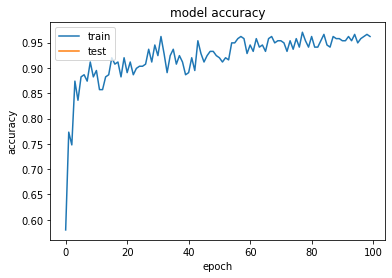

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

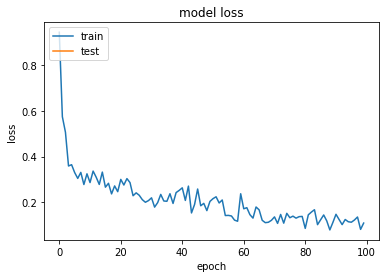

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
class_dict = train_generator.class_indices
indices_to_classes = {x : y for y,x in class_dict.items() }
indices_to_classes

{0: 'Accepted', 1: 'Rejected'}

In [ ]:
from random import seed
from random import random
# seed random number generator
seed(1)
def anomaly_prediction(path):
    img = cv2.imread(path)
    shrunked_img = cv2.resize(img , (128 , 128)  , interpolation = cv2.INTER_AREA)
    img_arr = img_to_array(shrunked_img)
    img_arr = img_arr / 255
    plt.imshow(img_arr)
    img_arr = img_arr.reshape(1 , img_arr.shape[0] , img_arr.shape[1] , img_arr.shape[2])
    anomaly_model = load_model('RT_image_classification_05.10.2021_model.h5')
    prediction = anomaly_model.predict(img_arr)
    if prediction - random() > 0.5:
        print('Normal', prediction)
    else:
        print('Defect',prediction)

Normal [[0.7646638]]
0.7128257751464844


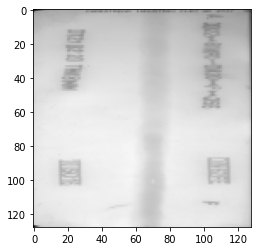

In [ ]:
t = time.time()
anomaly_prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/root1/Rejected/3022 - B1KFC - J 56 - DK30 - P - 21.02.2020.dcm.png')
print(time.time() - t)

Defect [[0.99482995]]
3.17390775680542


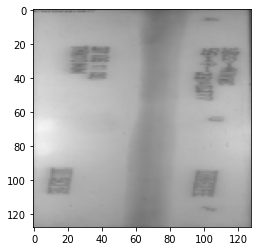

In [ ]:
t = time.time()
anomaly_prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/AI_Enabled_NDT_2_png/3022 - H1KRC - J91A - J77 - SS - P - 06.11.2020.dcm.png')
print(time.time() - t)

Defect [[0.6987633]]
0.49200916290283203


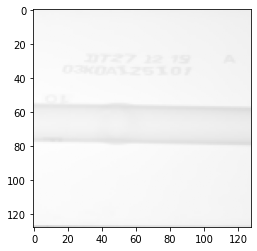

In [ ]:
t = time.time()
anomaly_prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/root1/Rejected/3020 - Pipe - 03KOA - 25 - 01 - A - R1 - 27.12.2019.dcm.png')
print(time.time() - t)

Normal [[0.9715256]]
1.036130428314209


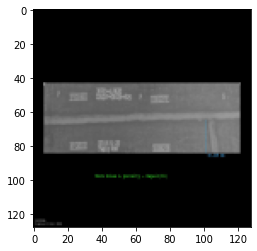

In [ ]:
t = time.time()
anomaly_prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/ground_truth_in_jpeg/3022 - L21KJC + G1KJC - S25 - DK20 - S - 08.11.2020.jpg')
print(time.time() - t)

Defect [[0.16998754]]
1.0341458320617676


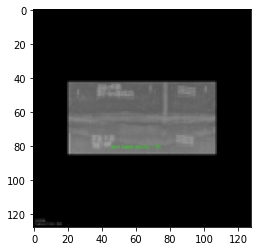

In [ ]:
t = time.time()
anomaly_prediction('/content/3025 - F2BS - J52A-J24 - DK 4 - S - 08.11.2020.jpg')
print(time.time() - t)

Defect [[0.45334265]]
0.8525829315185547


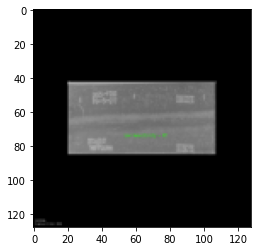

In [ ]:
t = time.time()
anomaly_prediction('/content/3025 - F3BC - J17 - BS - P - 24.01.2021.jpg')
print(time.time() - t)